# Rossmann Store Sales



# Bibliotheken importieren



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

C:\tools\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\tools\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\tools\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Daten importieren

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
# pd.set_option('display.max_columns', None)

dtypes_train = {
    'Store' : 'int',
    'DayOfWeek' : 'category',
    'Sales' : 'int',
    'Customers' : 'int',
    'Open' : 'bool',
    'Promo' : 'bool',
    'StateHoliday' : 'category',
    'SchoolHoliday' : 'bool'
}
train = pd.read_csv('train.csv', parse_dates = ['Date'], dtype = dtypes_train)
# display(train.info())
# display(train.head())

dtypes_store = {
    'Store' : 'int',
    'StoreType' : 'category',
    'Assortment' : 'category',
    'CompetitionDistance' : 'object',
    'CompetitionOpenSinceMonth' : 'object',
    'CompetitionOpenSinceYear' : 'object',
    'Promo2' : 'bool',
    'Promo2SinceWeek' : 'object',
    'Promo2SinceYear' : 'object',
    'PromoInterval' : 'object'
}

store = pd.read_csv('store.csv', dtype = dtypes_store)
# display(store.info())
# display(store.head())

demand = train.merge(store, how = 'inner', on = 'Store')
demand.set_index(['Date'], inplace = True)
demand.sort_index(axis = 0, ascending = True, inplace = True)
display(demand.info())
display(demand.head())
# display(daily_demand.info())
# display(daily_demand.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int32   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int32   
 3   Customers                  1017209 non-null  int32   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,False,False,a,True,d,c,5350,NaN,NaN,True,22,2012,"Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,False,False,a,True,d,c,4330,2,2011,True,35,2011,"Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,False,False,a,True,a,a,2640,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,694,2,0,0,False,False,a,True,a,c,460,11,2012,True,40,2014,"Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,False,False,a,True,a,c,23130,NaN,NaN,False,NaN,NaN,NaN


# Daten vorbereiten

In [3]:
demand['StateHoliday'] = demand['StateHoliday'].replace(to_replace = ['0','a','b','c'], value = ['None', 'Public holiday', 'Easter', 'Christmas']).astype('category')
demand['Assortment'] = demand['Assortment'].replace(to_replace = ['a','b','c'], value = ['basic', 'extra', 'extended']).astype('category')
demand['DayOfWeek'] = demand['DayOfWeek'].replace(to_replace = ['1','2','3','4','5','6','7'], value = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']).astype('category')

display(demand.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int32   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int32   
 3   Customers                  1017209 non-null  int32   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

## Modellieren und Schätzen

### Prophet

<ipython-input-38-4e03f3517f65>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Open'] = train['Open'].astype('int').to_numpy()
<ipython-input-38-4e03f3517f65>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Promo'] = train['Promo'].astype('int').to_numpy()
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


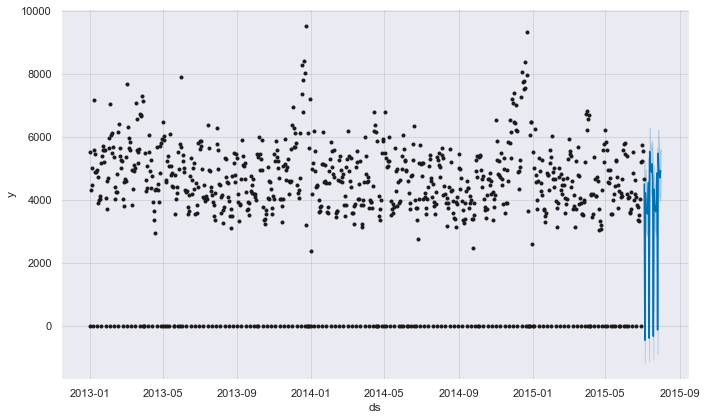

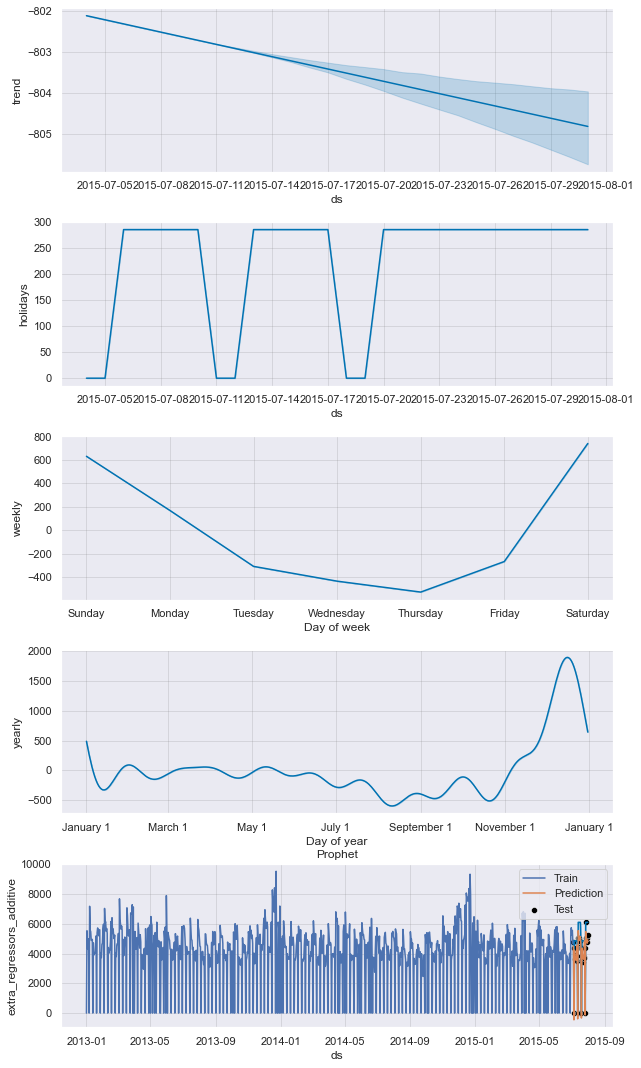

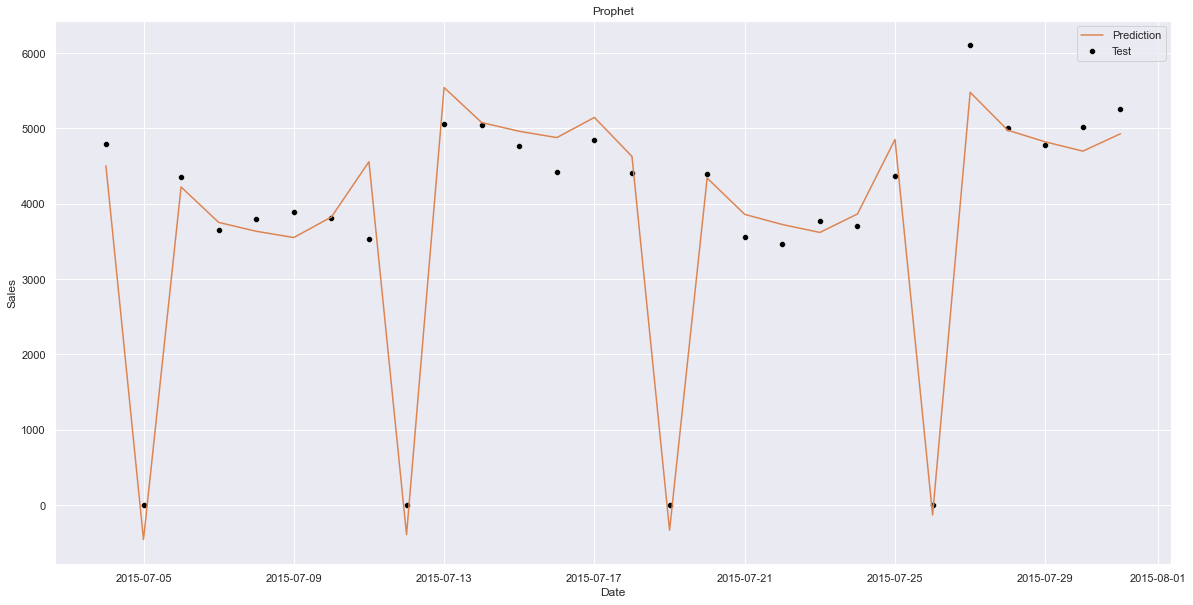

MAE:	 280.19


In [38]:
#!pip install prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.metrics import mean_absolute_error as MAE

train, test = temporal_train_test_split(demand[demand.Store ==1], test_size = 28)
# train.index.freq = 'D'
# test.index.freq = 'D'

data = pd.DataFrame(demand[demand.Store ==1]['Sales'].astype('float'))
data.reset_index(inplace = True)
data.columns = ['ds', 'y']
#display(data)
#display(data.info())

data_train, data_test = temporal_train_test_split(data, test_size = 28)

state_holidays = pd.DataFrame(demand[demand.StateHoliday != 'None']['StateHoliday'])
state_holidays.reset_index(inplace = True)
state_holidays.columns = ['ds', 'holiday']
state_holidays['lower_window'] = 0
state_holidays['upper_window'] = 0
#display(state_holidays)

school_holidays = pd.DataFrame(demand[demand.SchoolHoliday == True]['SchoolHoliday'])
school_holidays.reset_index(inplace = True)
school_holidays.columns = ['ds', 'holiday']
school_holidays['holiday'] = 'School Holiday'
school_holidays['lower_window'] = 0
school_holidays['upper_window'] = 0
#display(school_holidays)

holidays = pd.concat((state_holidays, school_holidays))
#display(holidays)

data_train['Open'] = train['Open'].astype('int').to_numpy()
data_train['Promo'] = train['Promo'].astype('int').to_numpy()
# display(data)

p = Prophet(yearly_seasonality = True, holidays = holidays)
# p = Prophet()
p.add_regressor('Open')
p.add_regressor('Promo')
p.fit(data_train)

future = p.make_future_dataframe(periods = len(test), freq='D', include_history = False)
future['Open'] = test['Open'].to_numpy()
future['Promo'] = test['Promo'].to_numpy()
# display(future)

forecast = p.predict(future)
fig = p.plot(forecast)
fig = p.plot_components(forecast)
plt.show()

forecast.set_index('ds', inplace = True)
# display(forecast)

sns.lineplot(data = train['Sales'], label = 'Train')
sns.scatterplot(data = test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast['yhat'], label = 'Prediction')
plt.title('Prophet')
plt.show()

sns.scatterplot(data = test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = forecast['yhat'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Prophet')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = test['Sales'], y_pred = forecast['yhat'])))

#scores = cross_validation(p, initial='606 days', period='28 days', horizon = '28 days')
#metrics = performance_metrics(scores)
#display(metrics)
#print('MAE:\t %4.2f' % (metrics['mae'].mean()))

#fig = p.plot(forecast)
#fig = p.plot_components(forecast)